In [1]:
import numpy as np
import networkx as nx #use for creating and manpulating complex networok i.e graph
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# definfe graph by specifying the edge
edge_list=[(0,2),(0,1),(0,3),(2,4),(5,6),(0,6),(5,3),(3,7),(0,8)] # a graph with 9 nodes

In [3]:
goal=7  # our oblective to get this node from any source

In [4]:
# instantiating graph
G=nx.Graph()
#add edge to this graph
G.add_edges_from(edge_list)

In [5]:
position=nx.spring_layout(G)

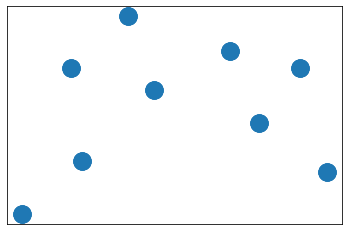

In [6]:
nx.draw_networkx_nodes(G,position)
nx.draw_networkx_nodes(G,position)
nx.draw_networkx_nodes(G,position)
plt.show()

## Setup rewards table and q-table both are these matrix

In [7]:
SIZE_MATRIX=9

In [8]:
#Reward matrix
R=np.matrix(np.ones(shape=(SIZE_MATRIX,SIZE_MATRIX)))
R*=-1

In [9]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [10]:
for edge in edge_list:
    print(edge)
    if edge[1]==goal:
        R[edge]=100 #the reward for any node which leads to the goal (node 7) is 100
    else:
        R[edge]=0 # no reward which not go to goal
    if edge[0]==goal: # also set it reverse
        R[edge[::-1]]=100
    else:
        R[edge[::-1]]=0
        

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [11]:
R[goal,goal]= 100 #when your are reward state our aim stay there

In [12]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [13]:
gamma=0.8

In [14]:
Q=np.matrix(np.zeros([SIZE_MATRIX,SIZE_MATRIX])) # q-table

In [15]:
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
# set helper function
# get available action from particular set of state
def get_available_actions(state):
    current_state_row=R[state,]
    # All available where the reward are  0 or greater are Aavailable from the current state
    available_actions=np.where(current_state_row>=0)[1]
    return available_actions

In [17]:
#choose next random sample state
def sample_next_action(available_action):
    next_action=int(np.random.choice(available_actions,size=1))
    return next_action

In [19]:
def get_available_actions(state):
    current_state_row=R[state]
    available_action=np.where(current_state_row>=0)[1]
    return available_action

In [20]:
def sample_next_action(avialable_action):
    next_action=int(np.random.choice(available_action,size=1))
    return next_action

In [3]:
def update(current_state,action,gamma):
    #find the index of the action which has the heighest Q-value
     max_index=np.where(Q[action,]==np.max(Q[action,]))[1]
     print('max_index',max_index.shape)
    #if more than one index has maximum Q value ,then choose next state at random
     if max_index.shape[0]>1:
            max_index=int(np.random.choice(max_index,size=1))
     else:
        max_index=int(max_index) # other wise find max Q value
     max_value=Q[action,max_index]
     Q[current_state,action]=R[current_state,action]+gamma*max_value
     print('max_value',R[current_state,action]+gamma*max_value)

# Q-Learning mathematical formula
## Q[state,action]=R[state,action]+discount*max(Q[next_state,all_action])

In [22]:
initial_state=0

In [23]:
available_action=get_available_actions(initial_state)

In [24]:
print(available_action)

[1 2 3 6 8]


In [25]:
action=sample_next_action(available_action)

In [26]:
print(action)

6


In [27]:
update(initial_state,action,gamma)

max_index (9,)
max_value 0.0


In [28]:
for i in range(700):
    current_state=np.random.randint(0,int(Q.shape[0]))
    available_action=get_available_actions(current_state)
    action=sample_next_action(available_action)
    update(current_state,action,gamma)

max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 180.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index 

max_index (1,)
max_value 317.3731836439039
max_index (1,)
max_value 397.3731836439039
max_index (1,)
max_value 203.1188375320985
max_index (1,)
max_value 253.89854691512312
max_index (1,)
max_value 317.3731836439039
max_index (1,)
max_value 497.3731836439039
max_index (2,)
max_value 253.89854691512312
max_index (1,)
max_value 253.89854691512312
max_index (1,)
max_value 317.3731836439039
max_index (1,)
max_value 497.3731836439039
max_index (1,)
max_value 253.89854691512312
max_index (1,)
max_value 317.3731836439039
max_index (1,)
max_value 317.3731836439039
max_index (1,)
max_value 497.8985469151231
max_index (1,)
max_value 398.31883753209854
max_index (1,)
max_value 253.89854691512312
max_index (1,)
max_value 203.1188375320985
max_index (2,)
max_value 253.89854691512312
max_index (1,)
max_value 253.89854691512312
max_index (1,)
max_value 253.89854691512312
max_index (1,)
max_value 317.3731836439039
max_index (1,)
max_value 317.3731836439039
max_index (1,)
max_value 317.3731836439039
ma

In [29]:
print('Tained Q Matrix')
pd.DataFrame(Q)

Tained Q Matrix


,0,1,2,3,4,5,6,7,8
0,0.000000,255.647435,255.647435,399.449117,0.000000,0.000000,255.647435,0.000000,255.647435
1,319.559293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,319.559293,0.000000,0.000000,0.000000,204.517948,0.000000,0.000000,0.000000,0.000000
3,319.559293,0.000000,0.000000,0.000000,0.000000,319.884471,0.000000,499.819487,0.000000
4,0.000000,0.000000,255.647435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,399.855589,0.000000,0.000000,255.647435,0.000000,0.000000
6,319.559293,0.000000,0.000000,0.000000,0.000000,319.559293,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,399.717948,0.000000,0.000000,0.000000,499.819487,0.000000
8,319.559293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
print('Modalrized Q Matrix')
pd.DataFrame(Q/np.max(Q)*100)

Modalrized Q Matrix


,0,1,2,3,4,5,6,7,8
0,0.000000,51.147953,51.147953,79.918676,0.000000,0.000000,51.147953,0.0,51.147953
1,63.934941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,63.934941,0.000000,0.000000,0.000000,40.918362,0.000000,0.000000,0.0,0.000000
3,63.934941,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,100.0,0.000000
4,0.000000,0.000000,51.147953,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,51.147953,0.0,0.000000
6,63.934941,0.000000,0.000000,0.000000,0.000000,63.934941,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,79.972462,0.000000,0.000000,0.000000,100.0,0.000000
8,63.934941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [31]:
current_state=0
steps=[current_state]


In [32]:
while current_state!=7:
    next_step_index=np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
    if next_step_index.shape[0]>1:
        next_step_index=int(np.random.choice(next_step_index,size=1))
    else:
        next_step_index=int(next_step_index)
    steps.append(next_step_index)
    current_state=next_step_index

In [34]:
print("Most efficient path")
steps

Most efficient path


[0, 3, 7]